In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("D:\\Datascience\\Data Sets\\city_day.csv")

In [8]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [13]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [10]:
df["AQI"].value_counts()

102.0     223
100.0     222
70.0      208
106.0     208
78.0      198
         ... 
891.0       1
847.0       1
1056.0      1
1426.0      1
620.0       1
Name: AQI, Length: 829, dtype: int64

# EDA Handling Missing Values

In [15]:
pmean=df["PM2.5"].mean()
df["PM2.5"].fillna(pmean,inplace=True)

In [19]:
pmmean=df["PM10"].mean()
df["PM10"].fillna(pmmean,inplace=True)

In [21]:
nmean=df["NO"].mean()
df["NO"].fillna(nmean,inplace=True)

In [22]:
nomean=df["NO2"].mean()
df["NO2"].fillna(nomean,inplace=True)

In [25]:
noxmean=df["NOx"].mean()
df["NOx"].fillna(noxmean,inplace=True)

In [26]:
nhmean=df["NH3"].mean()
df["NH3"].fillna(nhmean,inplace=True)

In [27]:
cmean=df["CO"].mean()
df["CO"].fillna(cmean,inplace=True)

In [28]:
smean=df["SO2"].mean()
df["SO2"].fillna(smean,inplace=True)

In [29]:
omean=df["O3"].mean()
df["O3"].fillna(omean, inplace=True)

In [31]:
bmean=df["Benzene"].mean()
df["Benzene"].fillna(bmean,inplace=True)

In [33]:
tmean=df["Toluene"].mean()
df["Toluene"].fillna(tmean,inplace=True)

In [35]:
xmean=df["Xylene"].mean()
df["Xylene"].fillna(xmean,inplace=True)

In [36]:
amean=df["AQI"].mean()
df["AQI"].fillna(amean,inplace=True)

In [45]:
df=df.drop('AQI_Bucket',axis=1)

In [46]:
df.isna().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

# Dividing the Data into X and Y

In [52]:
x=df.iloc[:,2:13].values
y=df.iloc[:,-1].values

In [53]:
x

array([[6.74505779e+01, 1.18127103e+02, 9.20000000e-01, ...,
        1.33360000e+02, 0.00000000e+00, 2.00000000e-02],
       [6.74505779e+01, 1.18127103e+02, 9.70000000e-01, ...,
        3.40600000e+01, 3.68000000e+00, 5.50000000e+00],
       [6.74505779e+01, 1.18127103e+02, 1.74000000e+01, ...,
        3.07000000e+01, 6.80000000e+00, 1.64000000e+01],
       ...,
       [2.29100000e+01, 6.57300000e+01, 3.45000000e+00, ...,
        3.09600000e+01, 1.00000000e-02, 1.00000000e-02],
       [1.66400000e+01, 4.99700000e+01, 4.05000000e+00, ...,
        2.83000000e+01, 0.00000000e+00, 0.00000000e+00],
       [1.50000000e+01, 6.60000000e+01, 4.00000000e-01, ...,
        1.70500000e+01, 3.28084030e+00, 8.70097208e+00]])

In [54]:
y

array([166.46358149, 166.46358149, 166.46358149, ...,  68.        ,
        54.        ,  50.        ])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.4,random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
linreg=LinearRegression()

In [61]:
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

# Model Evaluation

In [62]:
x=df.iloc[:,2:13]
y=df.iloc[:,-1]

In [63]:
linreg.intercept_

16.517026289794075

In [64]:
linreg.coef_

array([ 0.95203776,  0.27416166, -0.03176971,  0.40831046,  0.13346175,
       -0.05303887,  9.94101781,  0.6259331 ,  0.18604332, -0.31302205,
        0.24178675])

In [65]:
coef_df=pd.DataFrame(linreg.coef_,x.columns,columns=["Coefficient"])
coef_df

,Coefficient
PM2.5,0.952038
PM10,0.274162
NO,-0.031770
NO2,0.408310
NOx,0.133462
NH3,-0.053039
CO,9.941018
SO2,0.625933
O3,0.186043
Benzene,-0.313022


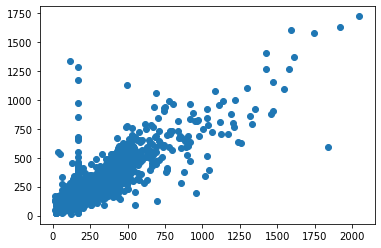

In [66]:
plt.scatter(ytest,ypred)

<AxesSubplot:ylabel='Density'>

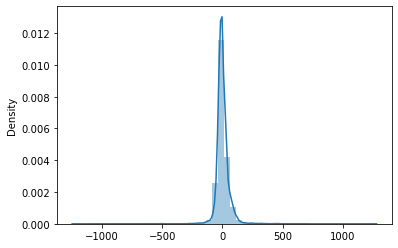

In [71]:
sns.distplot((ytest-ypred),bins=50)

In [72]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse,r2_score

In [73]:
print(f"MAE:-{mae(ytest,ypred)}")

MAE:-32.17291853891284


In [74]:
print(f"MSE:-{mse(ytest,ypred)}")

MSE:-3313.354484373639


In [75]:
print(f"RMSE:-{np.sqrt(mse(ytest,ypred))}")

RMSE:-57.56174497332094


In [76]:
print(f"R-squared:-{r2_score(ytest,ypred)}")

R-squared:-0.798253679811457
